Step 1: x = 2.94, y = 2.94
Step 76: x = 0.6461048593070722, y = 0.6461048593070722
Step 151: x = 0.14199030245585414, y = 0.14199030245585414
Step 226: x = 0.031204294010615048, y = 0.031204294010615048
Step 301: x = 0.006857566663777191, y = 0.006857566663777191
Step 376: x = 0.0015070432464247044, y = 0.0015070432464247044
Converged in 397 steps.


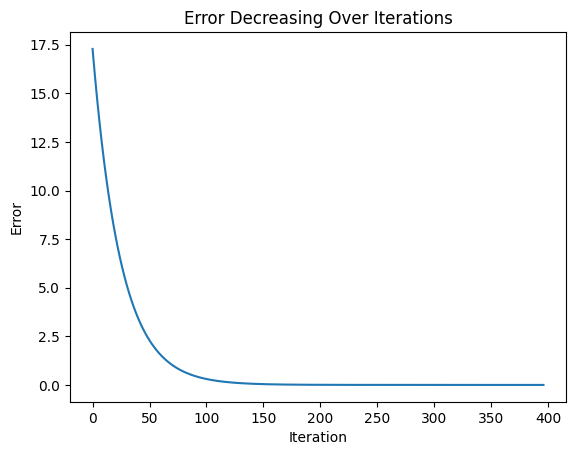

Final result: x = 0.0009859918033909537, y = 0.0009859918033909537, f(x, y) = 1.94435967270829e-06


In [1]:
import matplotlib.pyplot as plt

def gradient_descent(learning_rate=0.01, initial_x=3.0, initial_y=3.0, tolerance=1e-3, max_iterations=1000):
    x, y = initial_x, initial_y
    num_iterations = 0
    errors = []

    while num_iterations < max_iterations:
        # Compute gradients
        grad_x = 2 * x
        grad_y = 2 * y
        
        # Update steps
        step_x = learning_rate * grad_x
        step_y = learning_rate * grad_y
        
        # Update variables
        x -= step_x
        y -= step_y
        
        # Compute error (objective function value)
        error = x**2 + y**2
        errors.append(error)
        
        # Print current x and y values
        if num_iterations % 75 == 0:
            print(f"Step {num_iterations + 1}: x = {x}, y = {y}")
        
        # Increment iteration counter
        num_iterations += 1
        
        # Check for convergence
        if abs(x) < tolerance and abs(y) < tolerance:
            print(f"Converged in {num_iterations} steps.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")
    
    # Plot error over iterations
    plt.plot(errors)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error Decreasing Over Iterations')
    plt.show()
    
    return x, y, num_iterations

# Example usage
final_x, final_y, steps = gradient_descent()
print(f"Final result: x = {final_x}, y = {final_y}, f(x, y) = {final_x**2 + final_y**2}")


Step 1: x = 0.7071067811865475, y = 0.7071067811865475
Step 76: x = 0.15539630182775885, y = 0.15539630182775885
Step 151: x = 0.03415044412559979, y = 0.03415044412559979
Step 226: x = 0.007505023094232887, y = 0.007505023094232887
Step 301: x = 0.0016493305749645105, y = 0.0016493305749645105
Converged in 326 steps.


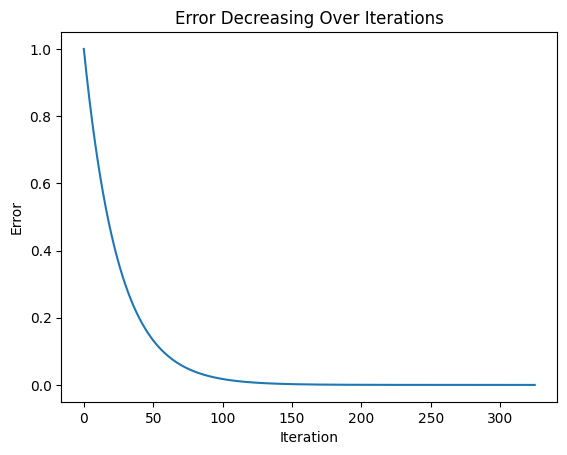

Final result: x = 0.0009953128297370312, y = 0.0009953128297370312, f(x, y) = 1.981295258078273e-06


In [2]:
import matplotlib.pyplot as plt

def projected_gradient_descent(
    learning_rate=0.01,
    initial_x=3.0,
    initial_y=3.0,
    tolerance=1e-3,
    max_iterations=1000,
):

    def normalize_if_outside_unit_circle(x, y):
        norm = (x**2 + y**2)**0.5
        if norm >= 1:
            x /= norm
            y /= norm
        return x, y

    x, y = initial_x, initial_y
    num_iterations = 0
    errors = []

    while num_iterations < max_iterations:
        # Compute gradients
        grad_x = 2 * x
        grad_y = 2 * y
        
        # Gradient descent step
        x_new = x - learning_rate * grad_x
        y_new = y - learning_rate * grad_y
        
        # Check if the new point is outside the unit circle
        if x_new**2 + y_new**2 >= 1:
            x_new, y_new = normalize_if_outside_unit_circle(x_new, y_new)
        
        # Update variables
        x, y = x_new, y_new
        
        # Compute error (objective function value)
        error = x**2 + y**2
        errors.append(error)
        
        if num_iterations % 75 == 0:
            print(f"Step {num_iterations + 1}: x = {x}, y = {y}")
        
        # Increment iteration counter
        num_iterations += 1
        
        # Check for convergence
        if abs(x) < tolerance and abs(y) < tolerance:
            print(f"Converged in {num_iterations} steps.")
            break
    else:
        print("Did not converge within the maximum number of iterations.")
    
    # Plot error over iterations
    plt.plot(errors)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error Decreasing Over Iterations')
    plt.show()
    
    return x, y, num_iterations

# Example usage
final_x, final_y, steps = projected_gradient_descent()
print(f"Final result: x = {final_x}, y = {final_y}, f(x, y) = {final_x**2 + final_y**2}")


Final slope (m): [2.98714476]
Final intercept (b): [7.10953538]


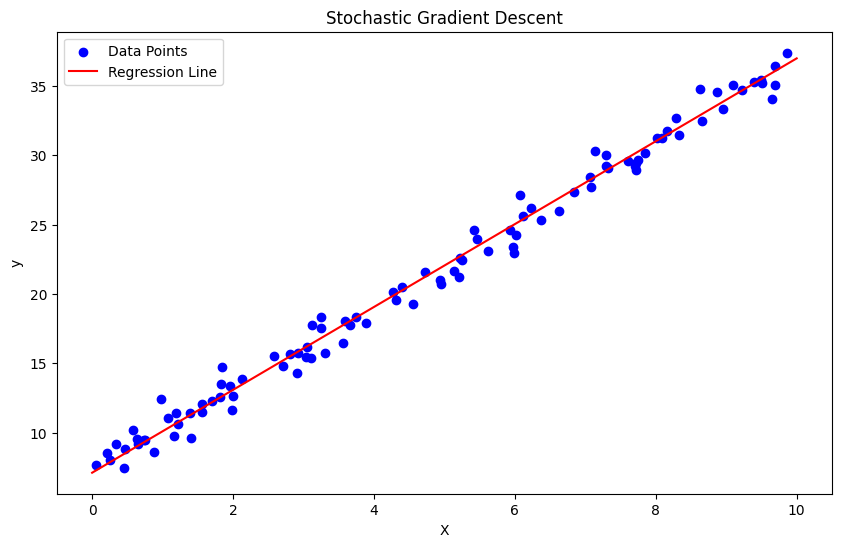

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate demo data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points in range [0, 10]
y = 3 * X + 7 + np.random.randn(100, 1)  # Linear relation with noise

# Step 2: Initialize parameters for SGD
m = 0  # Slope
b = 0  # Intercept
learning_rate = 0.01
epochs = 100

# Store parameter updates for visualization
m_values = []
b_values = []

# Step 3: Implement SGD
for epoch in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        yi = y[i]
        
        # Predictions
        y_pred = m * xi + b
        
        # Gradients
        grad_m = -2 * xi * (yi - y_pred)
        grad_b = -2 * (yi - y_pred)
        
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        
        m_values.append(m)
        b_values.append(b)

# Print final parameters
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot regression line
x_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label='Regression Line')

plt.title('Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


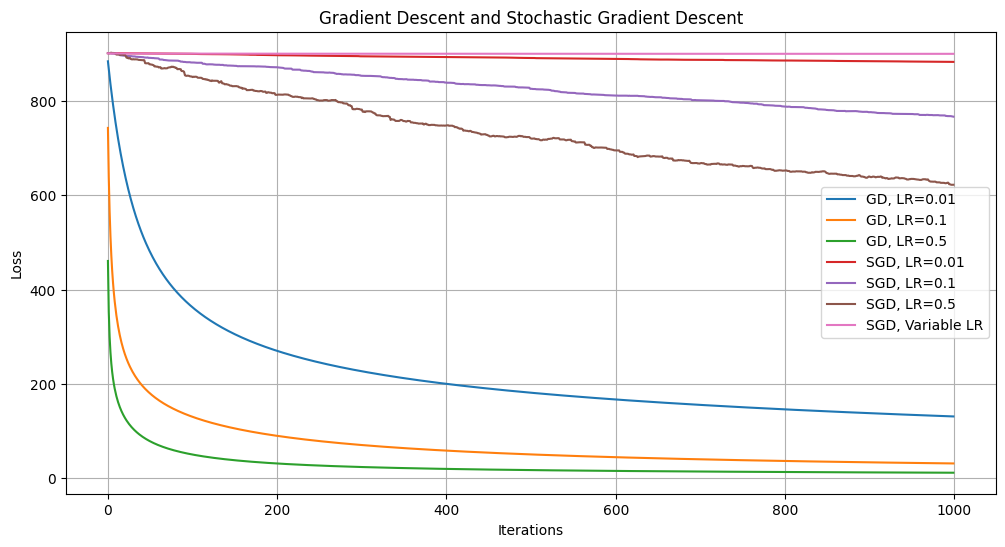

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate phi matrix of size mxm with elements ~ N(0, 1/m)
m = 1000  # Size of the matrix
phi = np.random.normal(0, 1/np.sqrt(m), (m, m))

# Step 2: Generate vector y of dimension m with elements ~ N(0, 1)
y = np.random.normal(0, 1, m)

# Step 3: Compute x* = (phi^T phi)^(-1) phi^T y
x_star = np.linalg.inv(phi.T @ phi) @ phi.T @ y

# Loss function and gradient
def loss(x):
    return np.linalg.norm(phi @ x - y) ** 2

def gradient(x):
    return phi.T @ (phi @ x - y)

# Gradient Descent implementation
def gradient_descent(learning_rate, max_iter=1000, tol=1e-3):
    x = np.zeros(m)  # Start at zero
    losses = []
    for i in range(max_iter):
        grad = gradient(x)
        x -= learning_rate * grad
        losses.append(loss(x))
        if np.linalg.norm(grad) < tol:
            break
    return x, losses

# Stochastic Gradient Descent implementation
def stochastic_gradient_descent(learning_rate, max_iter=1000, tol=1e-3, variable_lr=False):
    x = np.zeros(m)  # Start at zero
    losses = []
    for t in range(1, max_iter + 1):
        i = np.random.randint(0, m)  # Randomly pick a data point
        grad = phi[i] * (phi[i] @ x - y[i])  # Gradient for one sample
        lr = learning_rate / t if variable_lr else learning_rate
        x -= lr * grad
        losses.append(loss(x))
        if np.linalg.norm(grad) < tol:
            break
    return x, losses

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5]
max_iter = 1000

# Gradient Descent
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    x_gd, losses_gd = gradient_descent(learning_rate=lr, max_iter=max_iter)
    plt.plot(losses_gd, label=f"GD, LR={lr}")
    
# Stochastic Gradient Descent
for lr in learning_rates:
    x_sgd, losses_sgd = stochastic_gradient_descent(learning_rate=lr, max_iter=max_iter)
    plt.plot(losses_sgd, label=f"SGD, LR={lr}")

# SGD with Variable Learning Rate
x_sgd_var, losses_sgd_var = stochastic_gradient_descent(learning_rate=0.1, max_iter=max_iter, variable_lr=True)
plt.plot(losses_sgd_var, label="SGD, Variable LR")

# Plot settings
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent and Stochastic Gradient Descent")
plt.legend()
plt.grid()
plt.show()
